# 분류 알고리즘 선택


- 모든 경우에 뛰어난 성능을 낼 수 있는 분류 모델은 없다

- 최소한 몇 개의 학습 알고리즘 성능을 비교하고 해당 문제에 최선인 모델을 선택하는 것이 항상 권장

- 분류 모델의 예측 성능과 계산 성능은 학습에 사용하려는 데이터에 크게 의존한다

  - 특성이나 샘플의 개수
  - 데이터셋에 있는 잡음 데이터의 양
  - 클래스가 선형적으로 구분되는지 아닌지에 따라

- 머신러닝 알고리즘을 훈련하기 위한 다섯 가지 주요 단계

  1. 특성을 선택하고 훈련 샘플을 모은다
  2. 성능 지표를 선택
  3. 분류 모델과 최적화 알고리즘을 선택
  4. 모델의 성능을 평가
  5. 알고리즘을 튜닝

# 퍼셉드론 훈련

In [12]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))


y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


random_state=1을 통해 랜덤 시드를 고정

stratify=y를 통해 계층화 기능을 사용

`계층화`란 데이터셋과 테스트 데이터셋의 클래스 레이블 비율을 입력 데이터셋과 동일하게 만드는 것

## 표준화

In [14]:
#StandardScaler 클래스를 사용하여 특성을 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- 특성 차원마다 샘플 평균과 표준 편차를 계산해 훈련 데이터셋을 표준화
- 훈련 데이터셋과 테스트 데이터셋의 샘플이 서로 같은 비율로 이동되도록 동일한 샘플 평균과 표준 편차를 사용하여 테스트 데이터셋을 표준화

In [15]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)


Perceptron(eta0=0.1, random_state=1)

In [16]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


- 45개의 샘플에서 한 개를 잘못 분류
- 테스트 데이터셋에 대한 분류 오차는 약 0.022 또는 2.2%(1/45)

In [17]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

정확도: 0.978
정확도: 0.978


## 시각화

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

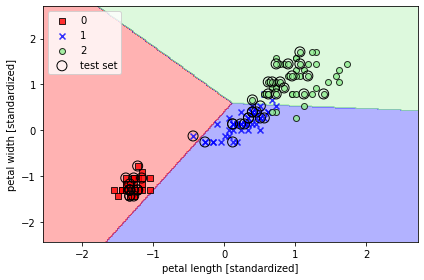

In [19]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

# 로지스틱 회귀를 사용한 클래스 확률 모델링

- 퍼셉트론 규칙의 큰 단점은 클래스가 선형적으로 구분되지 않을 때 수렴할 수 없다는 것
- 선형 이진 분류 문제에 더 강력한 다른 알고리즘인 로지스틱 회귀( logistic regression ) 을 사용하는것이 더 현명한 방법

### 로지스틱 회귀

- 손쉽게 다중 클래스 설정으로 일반화할 수 있다.
- 오즈비에 로그 함수( 로그 오즈 )를 취해 로짓( logit )함수를 정의

` logit(P)=log 
(1−p)
p` 
​

- logit 함수는 0과 1 사이의 입력값을 받아 실수 범위 값으로 변환

오즈비(특정 이벤트가 발생할 확률) $=\dfrac{P}{1-P}$ , ($P$는 양성 샘플에 대한 확률)

로짓 함수 : $logit(P)=log\dfrac{P}{1-P}$

$0\le P \le 1$이면, $0 \le \dfrac{P}{1-P} \le \infty$이고, $-\infty \le log\dfrac{P}{1-P} \le \infty$이므로

$log\dfrac{P}{1-P}=\boldsymbol{w}^T\boldsymbol{x}$처럼 쓸 수 있다.

따라서 양성 샘플일 확률 $P = \dfrac{1}{1+e^{-\boldsymbol{w}^T\boldsymbol{x}}}=\dfrac{1}{1+e^{-z}}$

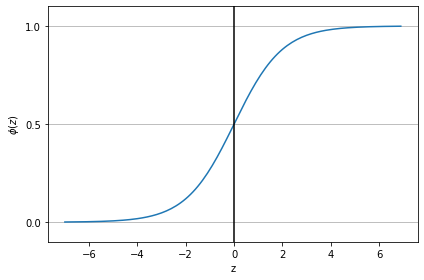

In [20]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

예측 확률 : $\hat{y}=\begin{cases}1&\phi(z)\ge 0.5\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$
$\hat y=\begin{cases}1&z\ge 0\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$

## 로지스틱 비용 함수의 가중치 학습하기


가능도 : $L(\boldsymbol w)=\prod^n_{i=1}\phi(z^{(i)})^{y^{(i)}}\left(1-\phi(z^{(i)})\right)^{1-y^{(i)}}$

로그 가능도 : $\text{log} L(\boldsymbol w)=\sum^n_{i=1}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]$

로지스틱 비용 함수 : $J(\boldsymbol w)=-\sum^n_{i=1}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]$

손실 계산 : $J(\boldsymbol w)=\begin{cases}-\text{log}\phi(z)&y=1\mbox{ 일 때} \\ -\text{log}(1-\phi(z))&y=0\mbox{일 때}\end{cases}$


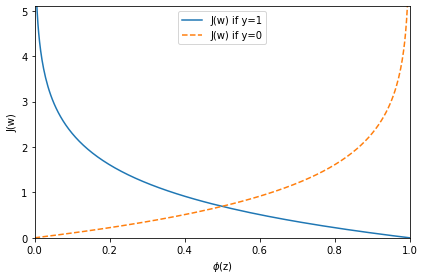

In [21]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## 아달린 구현을 로지스틱 회귀 알고리즘으로 변경


In [22]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        # 대신 from scipy.special import expit; expit(z) 을 사용할 수 있습니다.
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

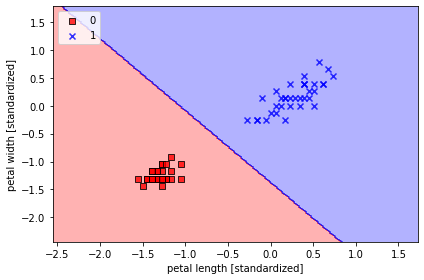

In [23]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

## 사이킷런을 사용하여 로지스틱 회귀 모델 훈련
- sklearn.linear_model.LogisticRegression의 fit 메서드를 사용하여 표준화 처리된 붓꽃 데이터셋의 클래스 세개를 대상으로 모델 훈련


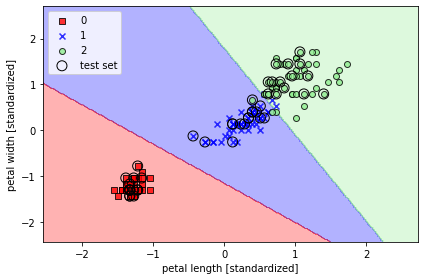

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [25]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [26]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [27]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [28]:
lr.predict(X_test_std[:3, :])


array([2, 0, 0])

In [29]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

lr = LogisticRegression(C=100.0 ∙∙∙) 에서 C를 통해 규제 강도를 조절

훈련 샘플이 어떤 클래스에 속할 확률은 predict_proba 메서드를 사용하여 계산

## 규제를 사용하여 과대적합 피하기

**과대적합**
- 모델이 훈련 데이터로는 잘 동작하지만 본 적 없는 데이터로는 잘 일반화되지 않는 현상
- 모델이 과대적합일 때 분산이 크다고 말한다
- 모델 파라미터가 너무 많아 주어진 데이터에서 너무 복잡한 모델을 만든 것

**과소적합**

- 훈련 데이터에 있는 패턴을 감지할 정도로 충분히 모델이 복잡하지 않다는 것을 의미
- 새로운 데이터에서도 성능이 낮다

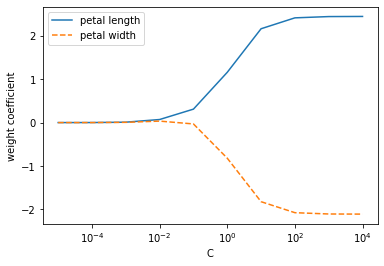

In [30]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('images/03_08.png', dpi=300)
plt.show()

L2 규제(L2 노름의 제곱) : $\lVert\boldsymbol{w}\rVert^2_2=\sum_{j=1}^m w_j^2$

L1 규제(L1 노름) : $\lVert\boldsymbol{w}\rVert_1=\sum_{j=1}^m \left|w_j\right|$

규제가 추가된 비용 함수 : $J(\boldsymbol w)=-\sum^n_{i=1}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]+\dfrac{\lambda}{2}\sum_{j=1}^m w_j^2$

- `C`는 $\lambda$의 역수로 증가시키면 규제가 작아지고, 감소시키면 규제가 커짐. 기본값은 1.0
- `penalty` 매개변수 기본값 `'l2'`, L1 규제를 위해 `'l1'`을 지정할 수 있음.

# 최대마진

마진 : 클래스를 구분하는 초평면( 결정 경계 )과 이 초평편이 가장 가까운 훈련 샘플 사이의 거리로 정의

**최대 마진** 
- 일반화 오차가 낮아지는 경향이 있기 때문에 큰 마진의 결정 경계를 알아야 한다
- 작은 마진의 모델은 과대적합이되기 쉽다


## 슬랙 변수를 사용하여 비선형 분류 문제 다루기

슬랙 변수 : 선형적으로 구분되지 않는 데이터에서 선형 제약 조건을 완화할 필요가 있기 때문에 도입

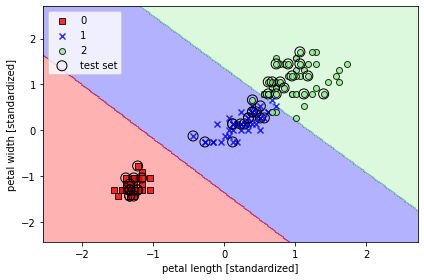

In [31]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_11.png', dpi=300)
plt.show()

- 규제가 있는 로지스틱 회귀 모델은 C값을 줄이면 편향이 늘고 모델 분산이 줄어든다
- 사이킷런을 사용할 경우 데이터셋이 너무 커서 컴퓨터 메모리 용량에 맞지 않는 경우가 있다 -> 이에 대한 대안으로 SGDClassifier 클래스를 제공

In [32]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## 커널 SVM을 사용하여 비선형 문제 풀기

### 선형적으로 구분되지 않은 데이터를 위한 커널 방법

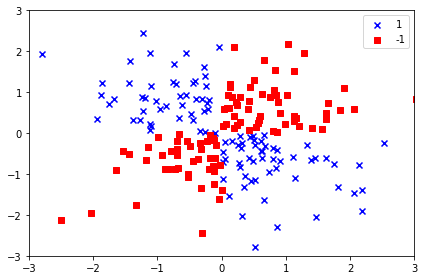

In [33]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_12.png', dpi=300)
plt.show()

선형적으로 구분되지 않는 데이터를 다루는 커널 방법의 기본 아이디어는 매핑 함수( ϕ )를 사용하여 고차원 공간에 투영하는 것

- SVM으로 비선형 문제를 풀기 위해 매핑 함수를 사용하여 훈련 데이터를 고차원 특성 공간으로 변환
- 새로운 특성 공간에서 데이터를 분류하는 선형 SVM 모델을 훈련
- 새로운 특성을 만드는 계산 비용이 매우 비싸다



## 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

방사 기저 함수(Radial Basis Function) : $K(\boldsymbol x^{(i)}, \boldsymbol x^{(j)})=\text{exp}\left(-\dfrac{1}{2\sigma^2}\lVert \boldsymbol x^{(i)}-\boldsymbol x^{(j)} \rVert^2\right)=\text{exp}\left( -\gamma\lVert \boldsymbol x^{(i)}-\boldsymbol x^{(j)} \rVert^2 \right)$

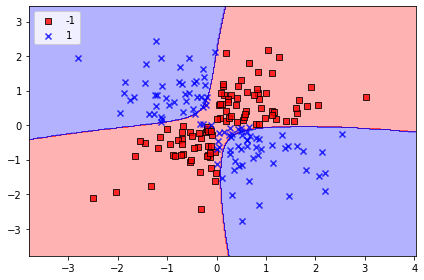

In [34]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

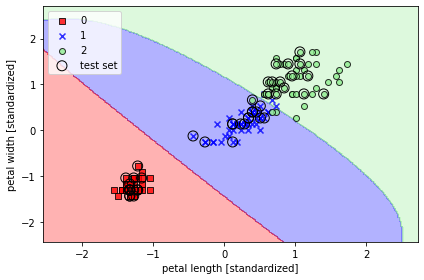

In [39]:
# r값 작게 했을 떄
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_15.png', dpi=300)
plt.show()

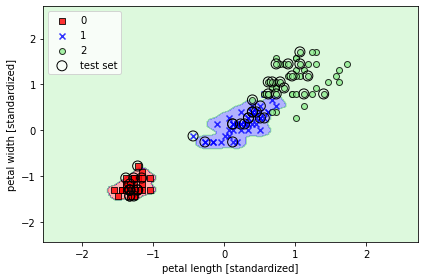

In [38]:
# r값 매우 크게 했을 때
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_16.png', dpi=300)
plt.show()

## 정보 이득 최대화, 자원 최대로 활용하기

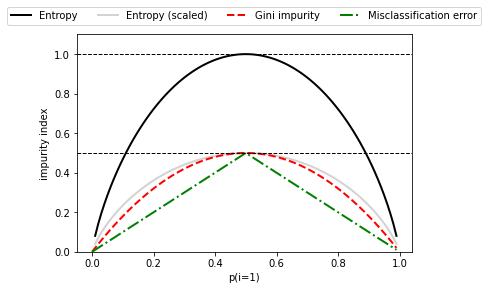

In [41]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
# plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

# 결정 트리 학습

- 결정트리( decision tree )분류기는 설명이 중요할 때 아주 유용한 모델
- 반복 과정을 통해 이프 노트( leaf node )가 순수해질 때까지 모든 자식 노드에서 이 분할 작업을 반복
- 특성 공간을 사각 격자로 나누기 때문에 복잡한 결정 경계를 만들 수 있다
- 결정 트리가 깊어질수록 결정 경계가 복잡해지고 과대적합되기 쉽기 때문에 주의해야 한다

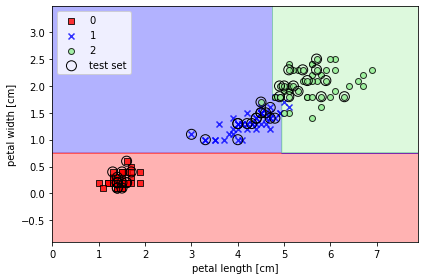

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_20.png', dpi=300)
plt.show()

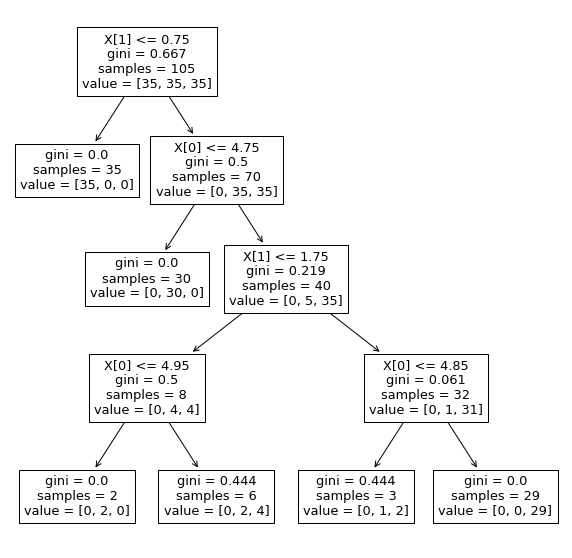

In [42]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(tree_model)
plt.show()

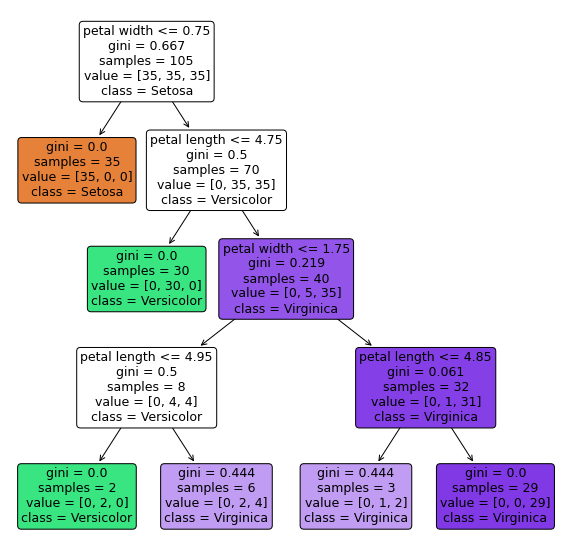

In [43]:
plt.figure(figsize=(10,10))
tree.plot_tree(tree_model,
               impurity=True,
               filled=True, 
               rounded=True,
               class_names=['Setosa', 
                            'Versicolor',
                            'Virginica'],
               feature_names=['petal length', 
                              'petal width'])
plt.show()

In [44]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

## 랜덤 포레스트로 여러개의 결정 트리 연결

- 랜덤 포레스트
  - 결정 트리의 앙상블
  - 여러개의 결정트리를 평균내는 것
  - 견고한 모델을 만들어 일반화 성능을 높이고 과대적합의 위험을 줄일 수 있다.


1. n개의 랜덤한 부트스트랩( bootstrap ) 샘플을 뽑는다
2. 부트스트랩 샘플에서 결정 트리를 학습

  a. 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택

  b. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할

3. 1 ~ 2단계를 k번 반복
각 트리의 예측을 모아 다수결 투표로 클래스 레이블을 할당

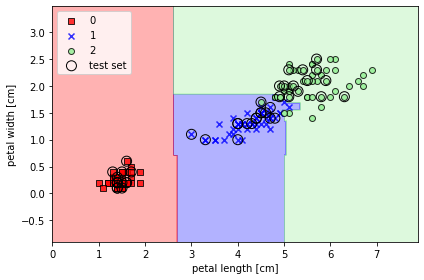

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_22.png', dpi=300)
plt.show()

- n_estimators 매개변수로 25개의 결정 트리를 사용
- 노드를 분할하는 불순도 지표로는 지니 불순도를 사용

## k-최근접 이웃: 게으른 학습 알고리즘

훈련 데이터에서 판별 함수를 학습하는 대신 훈련 데이터셋을 메모리에 저장한다

1. 숫자 k와 거리 측정 기준을 선택
2. 분류하려는 샘플에서 k개의 최근접 이웃을 찾는다
3. 다수결 투표를 통해 클래스 레이블을 

선택한 거리 측정 기준에 따라서 KNN 알고리즘이 훈련 데이터셋에서 분류하려는 포인트와 가장 가까운 샘플 k개를 찾는다

새로운 데이터 포인트의 클래스 레이블은 이 k개의 최근접 이웃에서 다수결 투표를 하여 결정

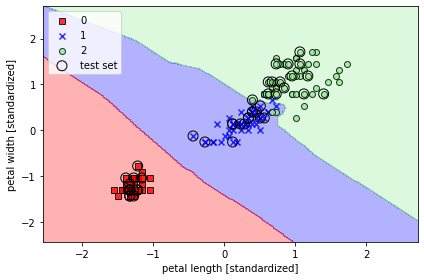

In [46]:
#유클리디안 거리 측정 방식을 사용한 사이킷런의 KNN 모델
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_24.png', dpi=300)
plt.show()